<center><h1> Exploratory Data Analysis</h1></center>

<img src='../references/banner.png'>

That is the second jupyter notebook of this project. To run this properly, download the data on kaggle [here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis), save it on ./data/raw and run the previous jupyter notebook (this jupyter notebook will generate a temporary file that will be used in this analysis).

In this Exploratory Data Analysis (EDA), we are going to explore the data and get some insights. We will make questions about the data to understand better how we can help the grocery to improve sells and understand the customers.

Let's get started and explore the data.

<i>Import the libraries </i>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_theme('whitegrid')
sns.set_style('white')

# Defining constants
FIRST_FIG = 0
SECOND_FIG = 1
THIRD_FIG = 2
SUBTITLE_COLOR = "#656565"

<i>Load the data</i>

In [4]:
data = pd.read_pickle('../data/interim/01_initial_cleaning.pkl')

<i>Check if it was loaded correctly.</i>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2212 non-null   int64         
 1   Year_Birth           2212 non-null   int64         
 2   Education            2212 non-null   object        
 3   Marital_Status       2212 non-null   object        
 4   Income               2212 non-null   float64       
 5   Kidhome              2212 non-null   int64         
 6   Teenhome             2212 non-null   int64         
 7   Dt_Customer          2212 non-null   datetime64[ns]
 8   Recency              2212 non-null   int64         
 9   MntWines             2212 non-null   int64         
 10  MntFruits            2212 non-null   int64         
 11  MntMeatProducts      2212 non-null   int64         
 12  MntFishProducts      2212 non-null   int64         
 13  MntSweetProducts     2212 non-nul

Everything seems ok, the datatypes are correct and all values are non-null.

I will make some questions trying to help improve the grocery's customer understanding:
#### Part 1 - understanding each variable
1. How many customers per age groups do we have in this dataset?
2. What is the mean and median customers age?
3. How many customers per education level?
4. What is the customers'average and median income?
5. How many children per customers?
6. How much of each product does the grocery sell?
7. What is the customers' total spent?
8. Which promotions was most sucessful?
9. How many responses?

Also, we can try to look at correlations among attributes:
#### Part 2 - Looking for correlations
1. Income vs TotalSpent
2. Income vs Education, Children, familysize
3. TotalSpent vs Education, children, familysize

### Part 1 - Understanding each variable

In this section, we will try to answer the first questions in order to understand our main features. So, we will divide the age into the following categories:

In [6]:
# Creating age groups
def group_ages(age):
    if age < 20:
        return 18
    elif age < 30:
        return 20
    elif age < 40:
        return 30
    elif age < 50:
        return 40
    elif age < 60:
        return 50
    elif age < 70:
        return 60
    return 70

data['group_age'] = data['Age'].apply(group_ages)

Now, we will plot the age distribution below:

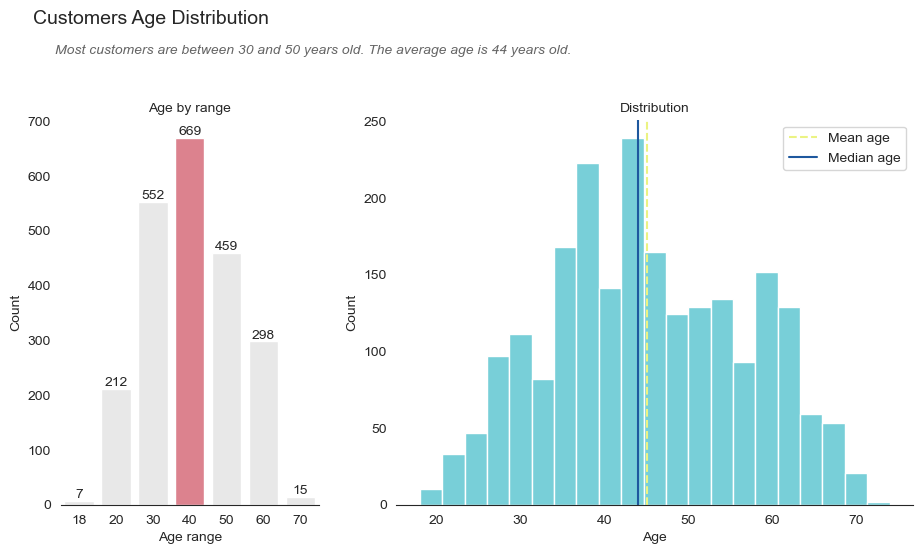

In [7]:
# Variables
colors = ['#E8E8E8',
          '#E8E8E8', 
          '#E8E8E8', 
          '#EB7383', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customers Age Distribution'
subtitle = 'Most customers are between 30 and 50 years old. The average age is 44 years old.'

# Create subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2, 
                       figsize=(11, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})

# Bar plot
sns.countplot(data=data, 
              x='group_age', 
              ax=ax[FIRST_FIG], 
              palette=colors)
ax[FIRST_FIG].bar_label(ax[FIRST_FIG].containers[0])
ax[FIRST_FIG].set_title(label='Age by range', 
                        fontsize=10)
ax[FIRST_FIG].set(xlabel='Age range',
                  ylabel='Count')

# Histogram
sns.histplot(data=data, 
             x='Age', 
             ax=ax[SECOND_FIG], 
             color='#4BBFCC')

mean_age = data['Age'].mean() # calc mean age
median_age = data['Age'].median() # calc median age

ax[SECOND_FIG].set(xlabel='Age',
                   ylabel='Count')
ax[SECOND_FIG].set_title(label='Distribution',
                         fontsize=10)
ax[SECOND_FIG].axvline(mean_age, 
                       color='#EBF383', 
                       ls="--", 
                       label="Mean age") #line mean age
ax[SECOND_FIG].axvline(median_age, 
                       color="#1E589E", 
                       ls="-", 
                       label="Median age") # line median age
# ax[SECOND_FIG].xlabel('hi')
ax[SECOND_FIG].legend()

sns.despine(left=True)

# title
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 10)
print()

Most of our customers are aged between 30 and 50 years old. The customers' age distribution are kind of similar to a normal distribution shape.

Now, we will plot the customers' education level:

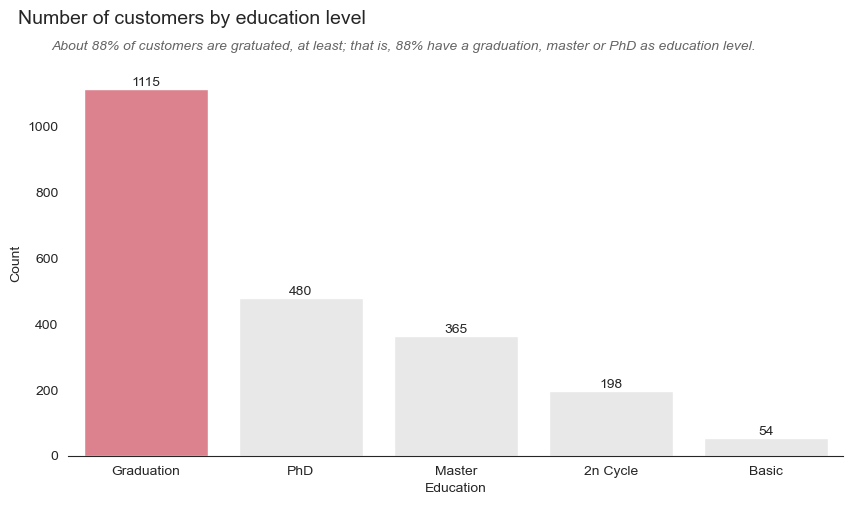

In [8]:
# Set figure size
plt.figure(figsize=(10, 5))

# variabels
colors = ['#EB7383',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8']
title = "Number of customers by education level"
subtitle = 'About 88% of customers are gratuated, at least; that is,\
 88% have a graduation, master or PhD as education level.'
label_order = ['Graduation',
               'PhD',
               'Master',
               '2n Cycle',
                'Basic']

# plot figure
fig = sns.countplot(data=data, 
                    x='Education', 
                    palette=colors,
                    order=label_order)

# Setting up layout
fig.set(ylabel='Count')
fig.bar_label(fig.containers[0])
plt.title(title, 
          x=0.16,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color=SUBTITLE_COLOR,
         x=0.46,
         y=0.94,
         fontstyle="italic",
         fontsize = 10)

sns.despine(left=True)

Most customers have a graduation degree or more. That might be a reflection of age (and also opportunities): most customers age 44 years old, in average, so they had time to invest in studying.

Now, we will plot the customers' income:

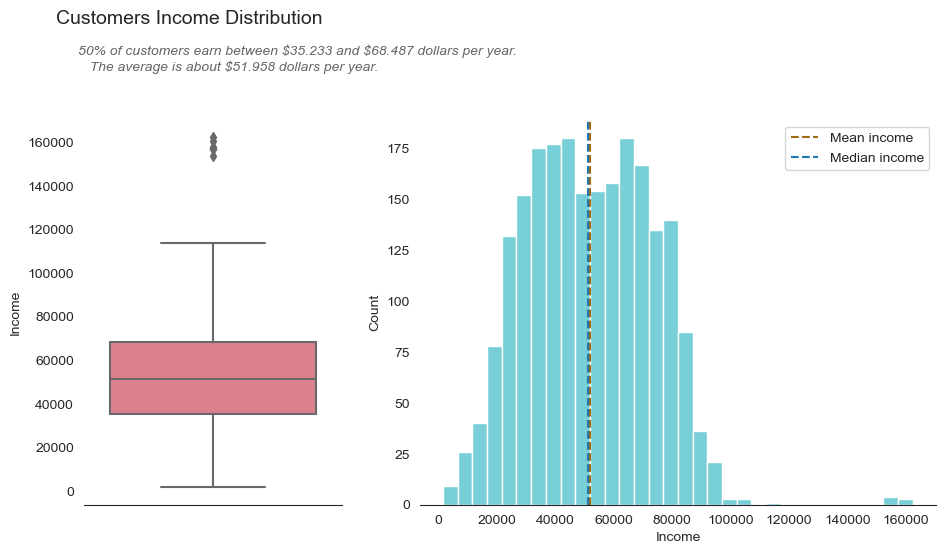

In [9]:
# Creating subplots
fig, ax = plt.subplots(nrows=1, 
                       ncols=2,
                       figsize=(11, 5), 
                       gridspec_kw={'width_ratios': [1, 2]})
#variabls
mean_income = data['Income'].mean()
median_income = data['Income'].median()
title = 'Customers Income Distribution'
subtitle = '50% of customers earn between \$35.233 and \$68.487 dollars per year.\
 \n   The average is about \$51.958 dollars per year.'

# Plot boxplot
ax2 = sns.boxplot(data=data,
                  y='Income',
                  ax=ax[0],
                  color='#EB7383')
# ax2.axhline(mean_income, # plot line mean income
#             color='#9E6B0E', 
#             ls="--", 
#             label="Mean income")
# Plot histogram
ax1 = sns.histplot(data=data, 
             x='Income', 
             color='#4BBFCC',
             ax=ax[1])
ax1.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="--", 
            label="Mean income")
ax1.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median income") 
ax1.legend()

# setting up figure
fig.suptitle(title,
             x=0.1, 
             y=1.1, 
             horizontalalignment='left', 
             verticalalignment='top', 
             fontsize=14)

fig.text(0.12, 
         1.03, 
         subtitle, 
         horizontalalignment='left', 
         verticalalignment='top', 
         color=SUBTITLE_COLOR,
         fontstyle="italic", 
         fontsize = 10)


sns.despine(left=True)

In average, customers have 51.958 dollars of income per year. 50 percent of customers earn between 35.233 and 68.487 dollars per year. There are a few outliers, that is, people who have a really high income per year.

Now, we will plot the customers' number of children:

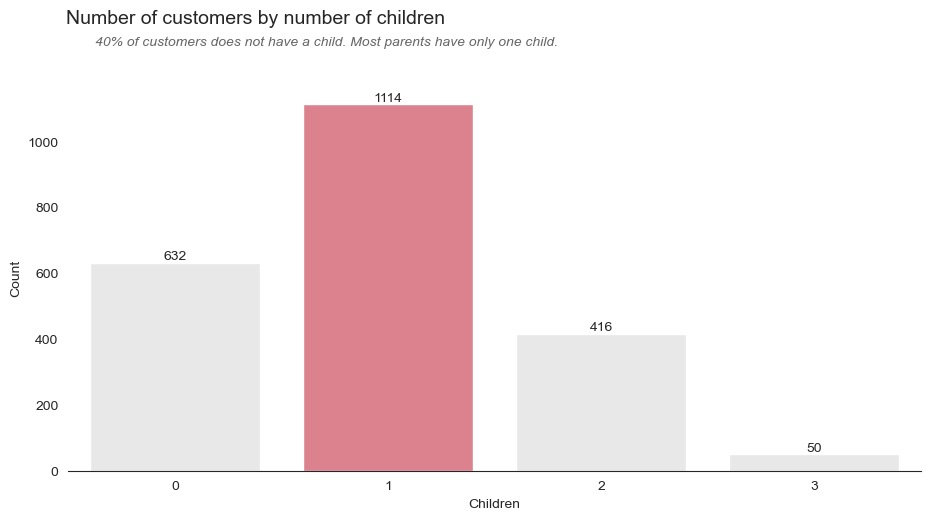

In [10]:
# set figure size
plt.figure(figsize=(11,5))

# variables
colors = ['#E8E8E8', 
          '#EB7383',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Number of customers by number of children'
subtitle = '40% of customers does not have a child. Most parents have only one child.'

# Plot bar figure
fig = sns.countplot(data=data, 
                    x='Children',
                    palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
fig.set(ylabel='Count')
plt.title(label=title,
          x=0.22,
          y=1.14,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.36,
         y=0.98,
         fontstyle="italic",
         fontsize = 10)
sns.despine(left=True)

About 40 percent of customers does not have any children. For those who does have children, most of them have only one, followed by two and three children.

Now, we will plot the number of selled products:

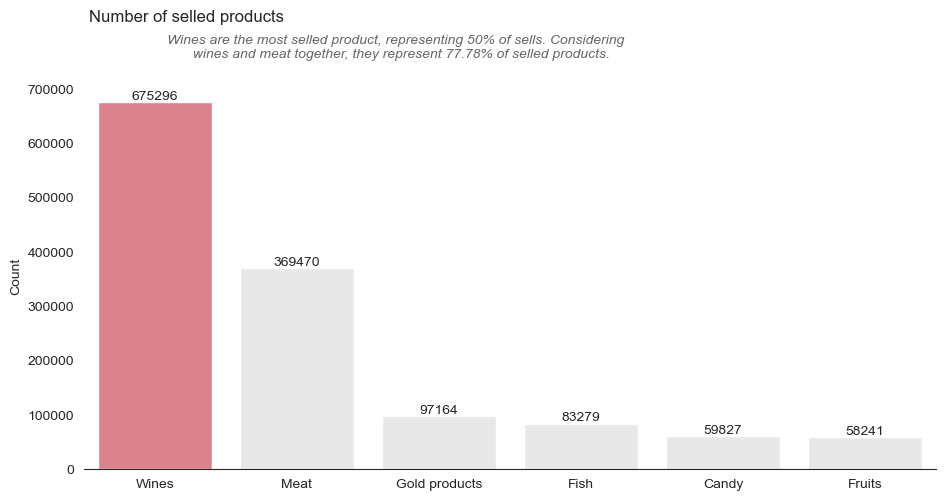

In [11]:
# Select columns related to products
fruit_cols = ['MntWines', 
              'MntFruits',
              'MntMeatProducts', 
              'MntFishProducts', 
              'MntSweetProducts',
              'MntGoldProds']

# Simplify names
fruit_dict = {'MntWines': 'Wines', 
              'MntFruits': 'Fruits', 
              'MntMeatProducts': 'Meat', 
              'MntFishProducts': 'Fish', 
              'MntSweetProducts': 'Candy',
              'MntGoldProds': 'Gold products'}

# Variabels
colors = ['#EB7383',
          '#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8',
          '#E8E8E8',
          '#E8E8E8']
title = 'Number of selled products'
subtitle = 'Wines are the most selled product, representing 50% of sells. Considering \n \
 wines and meat together, they represent 77.78% of selled products.'

# Calc number of each product
fruits = pd.DataFrame(data[fruit_cols].sum().sort_values(ascending=False))

# Replace names
fruits.index = fruits.index.map(fruit_dict)

# Figure size
plt.figure(figsize=(11, 5))

# Plot figure
fig = sns.barplot(data=fruits,
            x=fruits.index,
            y=0,
            palette=colors)

# Configure figure
fig.set(ylabel='Count')
plt.title(label=title, 
          x=0.12,
          y=1.14,)
plt.suptitle(subtitle, 
             color="#656565",
             x=0.41,
             y=0.98,
             fontstyle="italic",
             fontsize = 10)
fig.bar_label(fig.containers[0])
sns.despine(left=True)

Wines and meat are the most selled products. There is no information about the grocery, but we can think that this grocery focuses more on wines and meat products, so that would explain selling most products of this category.

Now, we will plot the number of accepted promotions:

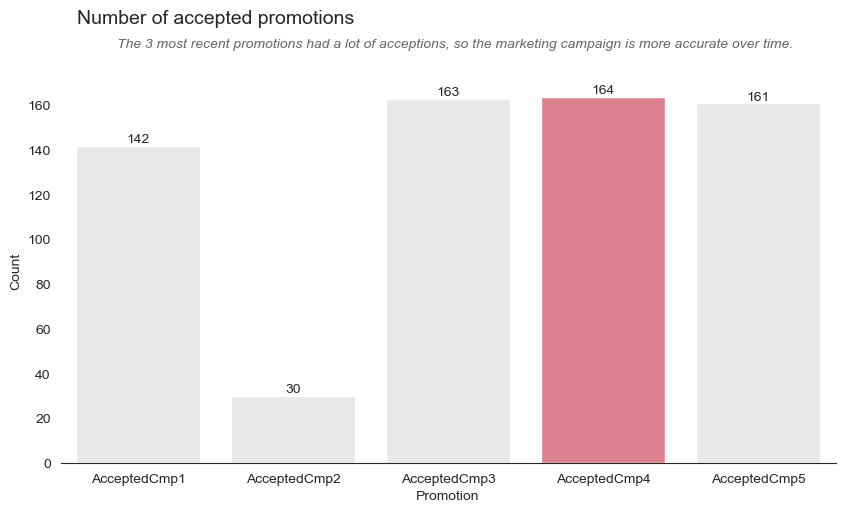

In [12]:
# Figure size
plt.figure(figsize=(10, 5))

# Variables
colors = ['#E8E8E8', 
          '#E8E8E8', 
          '#E8E8E8',
          '#EB7383',
          '#E8E8E8']
title = 'Number of accepted promotions'
subtitle = 'The 3 most recent promotions had a lot of acceptions, so the marketing campaign is more accurate\
 over time.'
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
promotions = pd.DataFrame(data[columns].sum())

# Plot figure
fig = sns.barplot(data=promotions, 
            y=0, 
            x=promotions.index,
            palette=colors)

# Setting up figure
fig.bar_label(fig.containers[0])
plt.title(label=title,
          x=0.2,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.52,
             y=0.96,
             fontstyle="italic",
             fontsize = 10)
fig.set(ylabel='Count',
        xlabel='Promotion')

sns.despine(left=True)

The second promotion was a failure because there were few acceptance, considering that the first promotion were better than the second. The third, fourth and last promotion were good, in general - So they learnt how to improve their promotions and influence more customers.

Now, we will plot the total spent distribution:

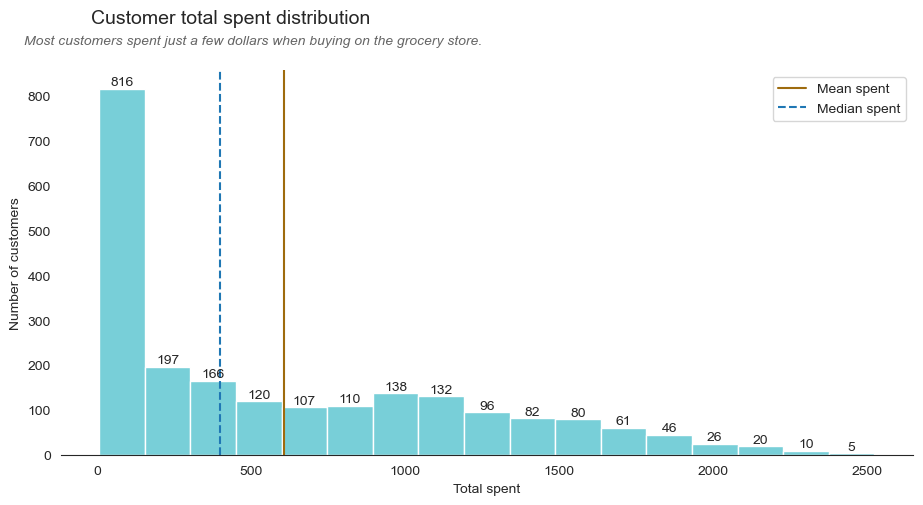

In [13]:
# Set figure size
plt.figure(figsize=(11, 5))

# Variables
colors = ['#E8E8E8', 
          '#51cedb',
          '#E8E8E8', 
          '#E8E8E8']
title = 'Customer total spent distribution'
subtitle = 'Most customers spent just a few dollars when buying on the grocery store.'
mean_income = data['TotalSpent'].mean()
median_income = data['TotalSpent'].median()

# Plot figure
fig = sns.histplot(data=data, 
                   x='TotalSpent',
                   color='#4BBFCC')
fig.axvline(mean_income, # plot line mean income
            color='#9E6B0E', 
            ls="-", 
            label="Mean spent")
fig.axvline(median_income, # plot line mean age
            ls="--", 
            label="Median spent")
fig.bar_label(fig.containers[0])

# Setting up figure
fig.set(xlabel='Total spent',ylabel='Number of customers')
plt.title(label=title,
          x=0.2,
          y=1.1,
          fontsize=14)
plt.suptitle(subtitle,  
         color="#656565",
         x=0.3,
         y=0.95,
         fontstyle="italic",
         fontsize = 10)
fig.legend()

sns.despine(left=True)

Most customers spent just a few dollars when buying products. 50 percent of customers spent up to 397 dollars in the grocery.

So, these were the feature we were interested in and we will explore some possible correlations in part 2 of this EDA.

### Part 2 - Looking for correlations

##### Income vs TotalSpent

Now, we will plot the features income and totalspent to analyse:

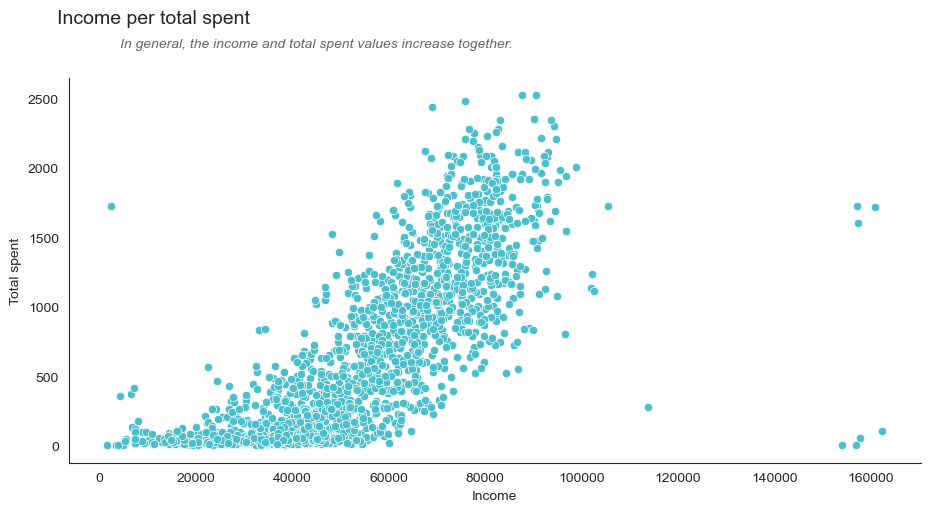

In [14]:
# Set figure size
plt.figure(figsize=(11, 5))

# Variables
title = 'Income per total spent'
subtitle = 'In general, the income and total spent values increase together.'

# Plot scatterplot
fig = sns.scatterplot(data=data,
                x='Income',
                y='TotalSpent',
                color='#4BBFCC')

# Setting up figure
plt.title(label=title,
          x=0.1,
          y=1.12,
          fontsize=14)
plt.suptitle(subtitle,  
             color=SUBTITLE_COLOR,
             x=0.35,
             y=0.96,
             fontstyle="italic",
             fontsize = 10)
fig.set(ylabel='Total spent',
        xlabel='Income')

sns.despine()

as the income increases the total spent tends to increase as well, especially above 60.000 dollars. There are some unusual high income and low total spent points, but in general, both features grow together.

##### Income

Now, we will plot income versus some features:

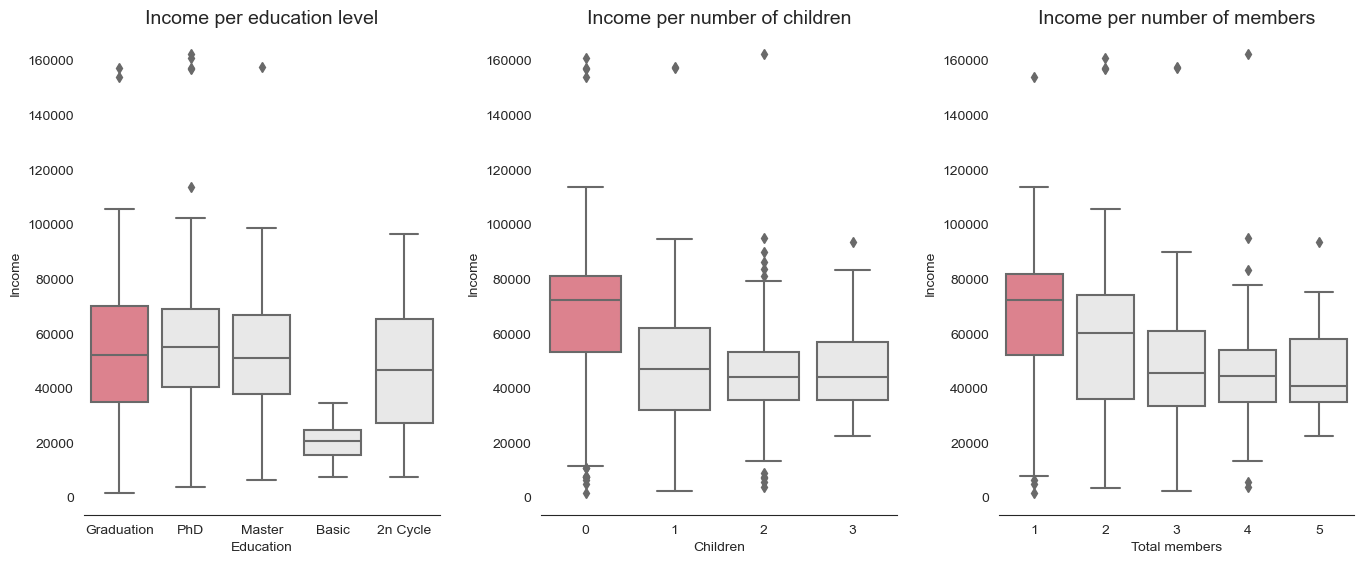

In [15]:
# Variables
colors_graph_1 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(14, 6))
# income vs Education
sns.boxplot(data=data, 
            x='Education', 
            y='Income', 
            ax=ax[FIRST_FIG], 
            palette=colors_graph_1)
ax[FIRST_FIG].set_title(label='Income per education level',
                        fontsize=14)

# Income vs Children
sns.boxplot(data=data, 
            x='Children', 
            y='Income', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)
ax[SECOND_FIG].set_title(label='Income per number of children',
                        fontsize=14)

sns.boxplot(data=data, 
            x='TotalMembers', 
            y='Income', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Income per number of members',
                        fontsize=14)
ax[THIRD_FIG].set(xlabel='Total members')


sns.despine(left=True)

fig.tight_layout(pad=2.0)

For the first graph we have: customers with basic educational level have lower income, in general. There is no much difference for most customers who have graduation, master or PhD.

For the second graph we have: customers that do not have children have higher income, in general, comparing with customers who have children. The difference are not so nitid among customers who have children.

For the third graph we have: customers who are alone have a higher income, and then the income decreases a little bit as the total members increase.

##### TotalSpent

Now, we will plot the total spent versus some features:

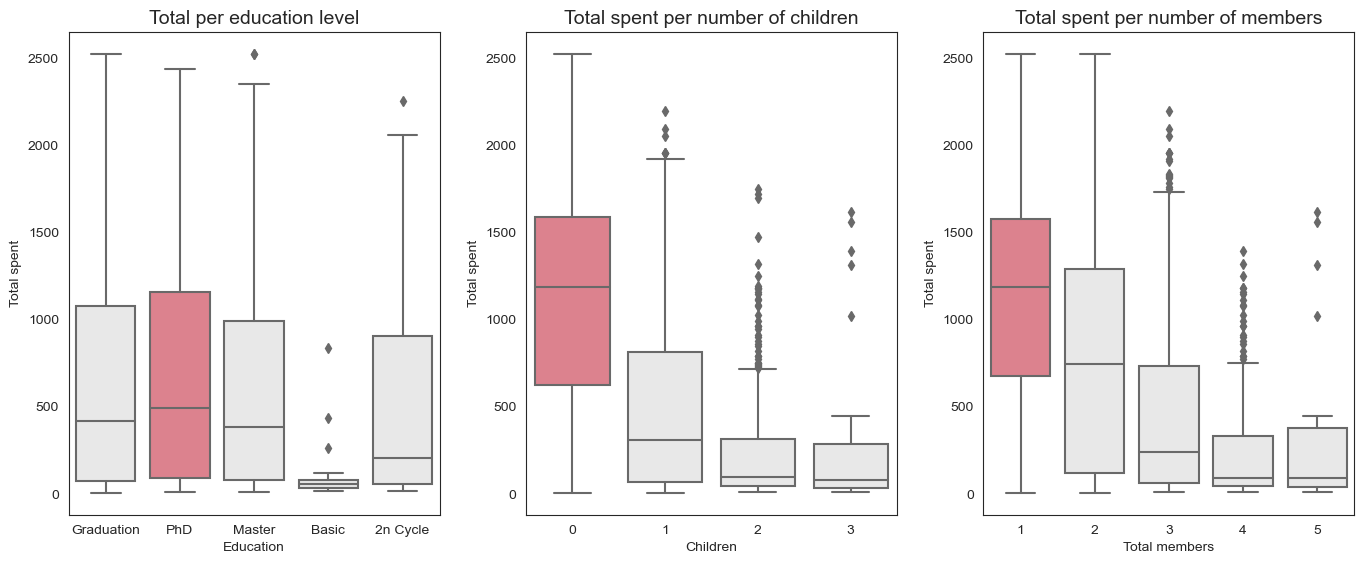

In [16]:
# Variables
colors_graph_1 = ['#E8E8E8',
                  '#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_2 = ['#EB7383', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

colors_graph_3 = ['#EB7383',
                  '#E8E8E8', 
                  '#E8E8E8', 
                  '#E8E8E8',
                  '#E8E8E8']

# Creating figure
fig, ax = plt.subplots(nrows=1, 
                       ncols=3, 
                       figsize=(14, 6))
# Plot Income vs Education
sns.boxplot(data=data, 
            x='Education', 
            y='TotalSpent', 
            ax=ax[FIRST_FIG],
            palette=colors_graph_1)

ax[FIRST_FIG].set_title(label='Total per education level',
                        fontsize=14)

ax[FIRST_FIG].set(ylabel='Total spent')

# Plot Income vs Children
sns.boxplot(data=data, 
            x='Children', 
            y='TotalSpent', 
            ax=ax[SECOND_FIG],
            palette=colors_graph_2)

ax[SECOND_FIG].set_title(label='Total spent per number of children',
                        fontsize=14)

ax[SECOND_FIG].set(ylabel='Total spent')

# Plot Income vs TotalMembers
sns.boxplot(data=data, 
            x='TotalMembers', 
            y='TotalSpent', 
            ax=ax[THIRD_FIG],
            palette=colors_graph_3)
ax[THIRD_FIG].set_title(label='Total spent per number of members',
                        fontsize=14)
ax[THIRD_FIG].set(ylabel='Total spent',
                  xlabel='Total members')

fig.tight_layout(pad=2.0)

For the first graph we have: There are similar total spent among customers who have graduation, master and PhD educational level. Most customers who have basic educational level tends to spend just a few dollars.

For the second graph we have: Customers that do not have a child spend more. The total spent decreases drastically as the number of children increases.

For the third graph we have: Customers that are alone, that is, the total members is one, tends to spend more money in the grocery. The total spent also decreases as the total members increase.

#### Conclusions:

Customers who spend more, in general, have the following qualities:
* Are single or maybe two members in family;
* Does not have children;
* In general, have a high income;

In my perspective, we cannot use education level as a feature importance for the total spent as it varies a lot. But this might be a good indicator too.

In the next jupyter notebook, we will make a clustering segmentation using machine learning and see how the model best segment our customers based on these analyzed features.

In [18]:
data.to_pickle('../data/interim/02_analyzed_data.pkl')